# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [369]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
1397 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 1397
Submissions graded.


### Dataset

In [370]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [371]:
# Filter by institution
specific_institutions = ['UiO'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [372]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024']
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [373]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [374]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 1230 student submissions.



### Institutions

Institution
Norges teknisk-naturvitenskapelige universitet (NTNU)    573
Universitetet i Stavanger (UiS)                          324
Universitetet i Oslo (UiO)                               210
Universtitetet i Bergen (UiB)                            103
Høgskulen på Vestlandet (HVL)                             17
Name: count, dtype: int64


<Axes: ylabel='count'>

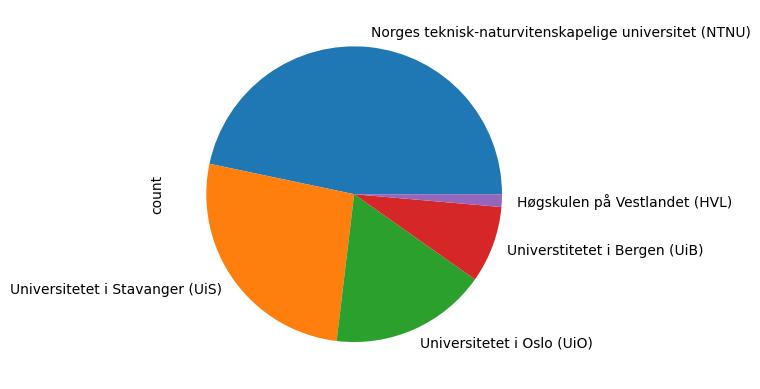

In [375]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2024     322
2023     263
2022     242
2021     100
2019      55
2020      45
2018      28
2017      18
2015      15
2014      12
2016       8
2005       7
Annet      5
2012       4
2007       3
2010       3
2011       3
2008       1
2009       1
Name: count, dtype: int64


<Axes: ylabel='count'>

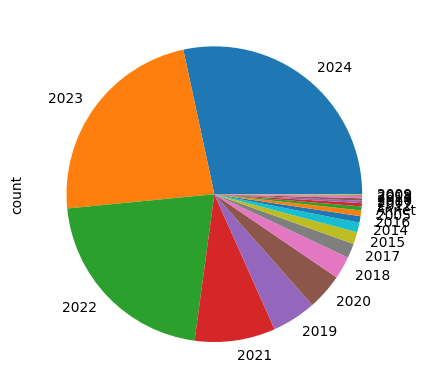

In [376]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    729
f    414
      87
Name: count, dtype: int64
Gender
m    0.592683
f    0.336585
     0.070732
Name: proportion, dtype: float64


<Axes: ylabel='count'>

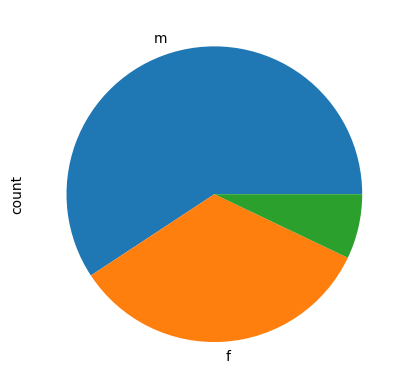

In [377]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [378]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

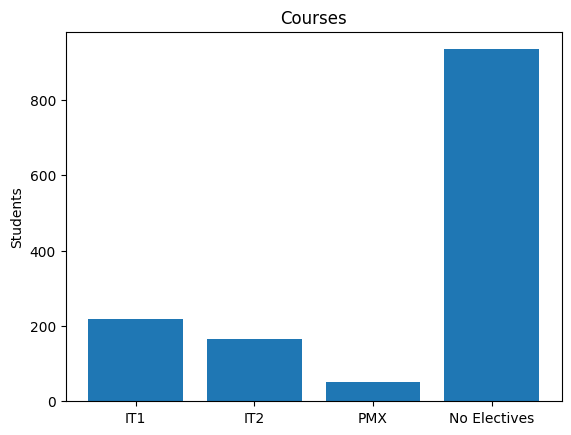

In [379]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

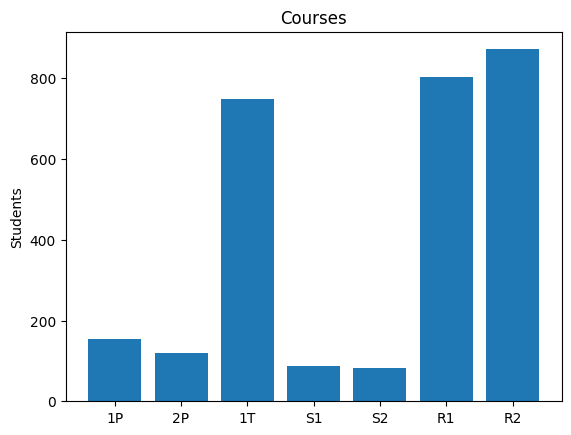

In [380]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    966
Ja     260
Name: count, dtype: int64
OutsideExperience
Nei    0.787928
Ja     0.212072
Name: proportion, dtype: float64


<Axes: ylabel='count'>

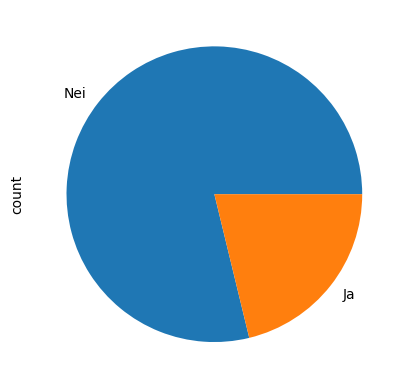

In [381]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [382]:
# Configurations
bins = 25
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 22.914
Standard deviation: 16.446


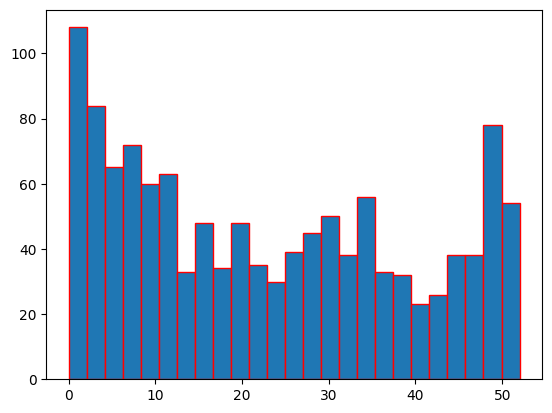

In [383]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.show() 

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

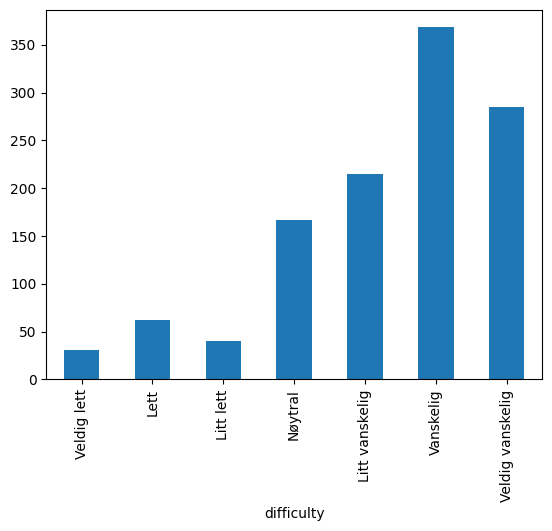

In [384]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [385]:
def compare_distributions(x, y, x_label, y_label):
    mean = x.mean()
    sd = x.std()
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()
    
    mean = y.mean()
    sd = y.std()
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

Mean of 2023 and 2024: 28.891
Standard deviation of 2023 and 2024: 15.422

Mean of before 2023: 17.493
Standard deviation of before 2023: 15.447


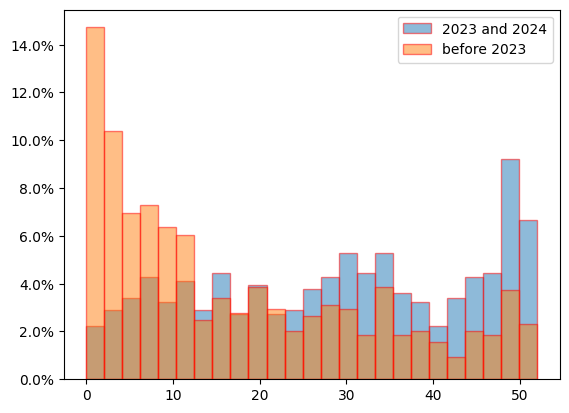

In [386]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

### Gender

Mean of women: 16.952
Standard deviation of women: 14.547

Mean of men: 26.219
Standard deviation of men: 16.478


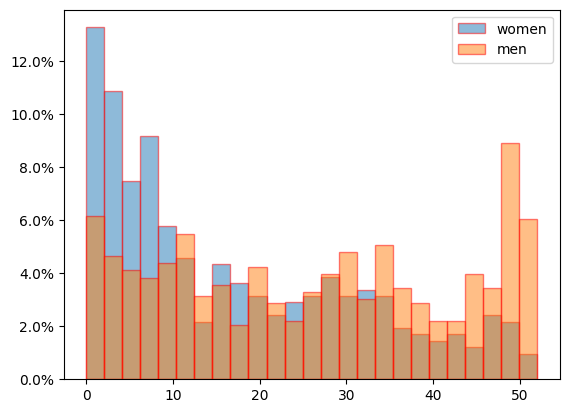

In [387]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [388]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [389]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       52.87 %
Booleans        62.30 %
Variables       52.64 %
Conditionals    57.56 %
Loops           29.57 %
Lists           33.13 %
Functions       21.75 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [390]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [391]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
0    619
1    611
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             611
Jeg vet ikke    434
str              78
float            60
list             25
bool             18
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
1    615
0    615
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           615
Jeg vet ikke    436
int              81
str              62
bool             22
list              5
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
0    709
1    521
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
Jeg vet ikke    532
str             521
float            52
int              50
bool             47
list             14
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    854
0    376
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            854
Jeg vet ikke    323

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [392]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    1016
0     214
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            1016
I don't know     129
12.0              17
1212.0             9
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [393]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    845
0    385
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           845
I don't know    199
12.23             5
13.0              5
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [394]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    833
1    397
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        397
I don't know    295
246.0           105
123.0             8
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [395]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    786
0    444
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             786
I don't know    238
1.0              65
3.0              26
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [396]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    849
1    381
Name: count, dtype: int64

Top 4 most common answers:
Operators5
I don't know    453
bca             371
'bca'            13
abc              11
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [397]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    729
0    501
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0     729
10.0      63
1.0        2
0.5        1
30.0       1
15.0       1
10.2       1
220.0      1
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    723
0    507
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            723
I don't know    433
10.0             57
2.0               3
1.0               1
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [398]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
1    687
0    543
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    687
20.0     71
2.0       2
40.0      1
30.0      1
0.5       1
0.0       1
1.0       1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
1    680
0    550
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            680
I don't know    458
20.0             75
30.0              2
1.0               2
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [399]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
1    671
0    559
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    671
10.0     60
29.0      1
1.0       1
0.5       1
0.0       1
15.0      1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
0    641
1    589
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            589
I don't know    491
10.0            136
2.0               1
1.0               1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [400]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
0    636
1    594
Name: count, dtype: int64

Top 5 most common answers:
Variables4a
10.0    594
20.0    114
1.0       2
Name: count, dtype: int64
Number of correct responses:
Variables4b_points
1    637
0    593
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            637
I don't know    506
20.0             71
2.0               2
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [401]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
1    663
0    567
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    663
10.0     37
30.0     36
1.0       3
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
1    688
0    542
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
 30.0    688
 20.0     21
 10.0     20
 2.0       2
 15.0      2
 3.0       1
-10.0      1
 1.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
1    679
0    551
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            679
I don't know    480
10.0             22
20.0             21
3.0               2
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [402]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
1    658
0    572
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    658
20.0     32
10.0     19
6.0       1
60.0      1
5.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0    692
1    538
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
30.0    538
10.0    144
20.0     26
0.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0    702
1    528
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
30.0            528
I don't know    496
20.0            125
10.0             52
60.0              1
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [403]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            991
Jeg vet ikke    196
False            24
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           1085
Jeg vet ikke      88
True              37
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            905
Jeg vet ikke    155
False           149
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           1072
Jeg vet ikke     101
True              32
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            1049
Jeg vet ikke     108
False             52
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           958
Jeg vet ikke    215
True             37
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [404]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
False           657
Jeg vet ikke    505
True             47
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           927
Jeg vet ikke    246
True             38
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            631
Jeg vet ikke    329
False           247
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            917
Jeg vet ikke    260
False            26
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            742
Jeg vet ikke    332
False           135
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    681
True            474
False            57
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [405]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
Jeg vet ikke    622
False           528
True             53
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    634
False           498
True             67
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    610
True            540
False            48
Name: count, dtype: int64

Top 3 most common answers:
True and True
True            591
Jeg vet ikke    547
False            61
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    575
True            462
False           158
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    740
True            375
False            85
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [406]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            997
Jeg vet ikke    142
False            70
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           917
Jeg vet ikke    274
True             19
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           921
Jeg vet ikke    203
True             80
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            713
Jeg vet ikke    263
False           229
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            867
Jeg vet ikke    249
False            94
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
False           574
Jeg vet ikke    509
True            125
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [407]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    834
0    396
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       834
Jeg vet ikke    225
1               162
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [408]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
0    618
1    612
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               612
Jeg vet ikke    471
1                74
1 og 2           33
Ingenting        29
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [409]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    696
0    534
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               696
Jeg vet ikke    335
2 og 3           70
3                40
1 og 2           25
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [410]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    690
0    540
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          690
Jeg vet ikke    336
1                80
2                28
1, 2 og 3        27
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [411]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    814
1    416
Name: count, dtype: int64

Top 5 most common answers:
Loops1
10.0            416
I don't know    358
9.0             140
1.0             138
123456789.0      65
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [412]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    847
1    383
Name: count, dtype: int64

Top 5 most common answers:
Loops2
10.0            383
I don't know    365
2.0             138
8.0             127
2468.0           66
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [413]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
0    644
1    586
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             586
I don't know    478
0                46
102              27
98                6
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [414]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    889
1    341
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    475
4.0             341
3.0             111
1.0              94
0.0              51
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [415]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    917
1    313
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    809
5.0             313
0.0              22
3.0              12
125.0            10
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [416]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    953
1    277
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    825
9.0             277
0.0              28
5.0              10
-5.0              7
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [417]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    872
1    358
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    538
20.0            358
10.0            275
102030.0         20
60.0              6
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [418]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    875
1    355
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    569
25.0            355
15.0            237
152535.0          9
65.0              7
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [419]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
0    628
1    602
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    602
Jeg vet ikke    501
[15, 35, 55]     29
[5, 15, 25]      11
[10, 35, 30]      5
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    915
1    315
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    619
[5, 35, 25]     315
[15, 35, 55]    153
[5, 15, 25]      60
[10, 35, 30]     17
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [420]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
0    683
1    547
Name: count, dtype: int64

Top 5 most common answers:
Functions1
I don't know    622
15.0            547
5.1              10
510.0             8
9.0               1
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [421]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    867
1    363
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    760
1.0             363
2.0              30
100.0            25
3490834809.0      1
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [422]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    1046
1     184
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    761
1.0             184
12.0            109
1.2              50
2.0              37
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [423]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    976
1    254
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    877
5.0             254
6.0              21
9.0               1
20.0              1
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [424]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    949
1    281
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    678
10.0            281
6.0              92
9.0              51
5.0              32
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [425]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    1023
1     207
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    915
abcxyz          202
abcxabcyabcz      7
abc               5
Abcxyz            5
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [426]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    977
1    253
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    862
c               244
b                24
C                 9
2                 3
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [427]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    962
1    268
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    843
25.0            268
15.0             36
152535.0          5
65.0              4
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [428]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    1179
1      51
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    919
80.0             94
90.0             51
21.0             14
23.0             12
Name: count, dtype: int64
